<a href="https://colab.research.google.com/github/SoheliPaul/Computer-Vision/blob/main/2348561_CV_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download any image dataset of your own
Perform image preprocessing

Extract any 3 image features from the image dataset

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

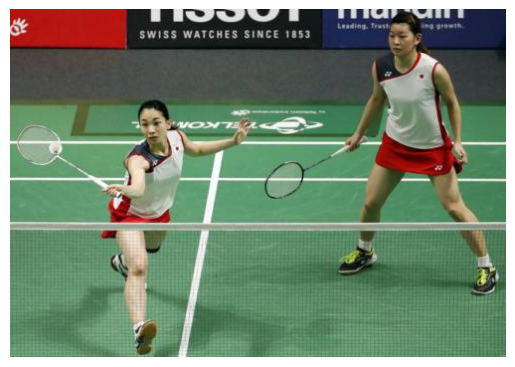

In [2]:
image_path = '/content/drive/MyDrive/DATASETS/cvlab9data/data/badminton/00000052.jpg'
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

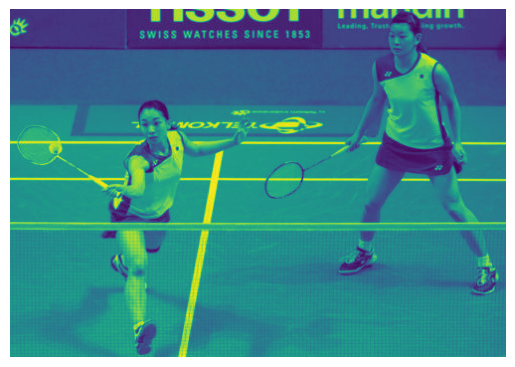

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')
plt.show()

# Edge Detection

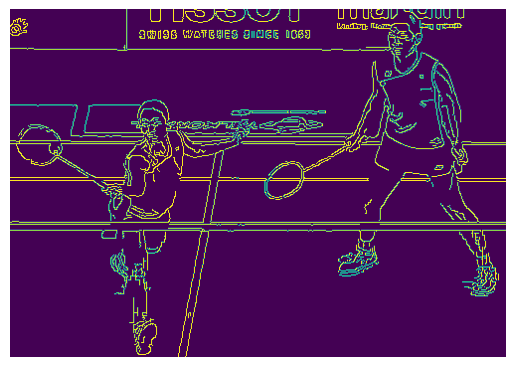

In [4]:
canny = cv2.Canny(gray, 100, 200)
plt.imshow(canny)
plt.axis('off')
plt.show()

# Line Detection

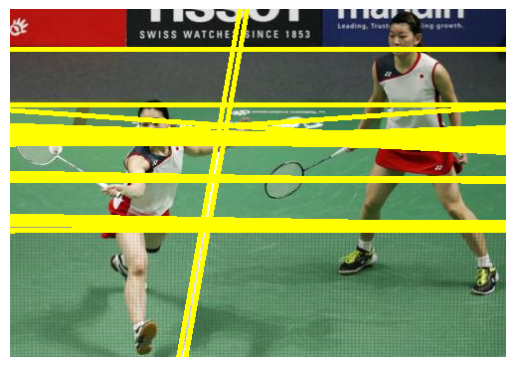

In [5]:
edges = cv2.Canny(gray, 100, 200, apertureSize=3)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=120)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (255,255,0),3)

plt.imshow(img)
plt.axis('off')
plt.show()

# Point Detection

(-0.5, 498.5, 349.5, -0.5)

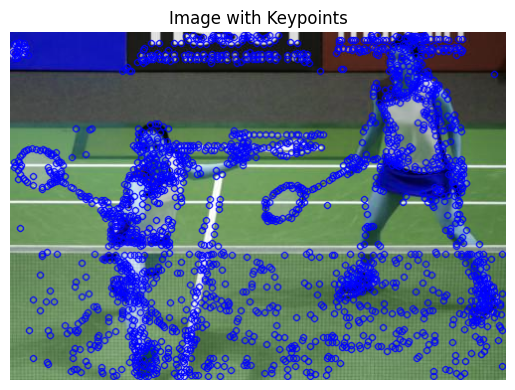

In [7]:
image_path = '/content/drive/MyDrive/DATASETS/cvlab9data/data/badminton/00000052.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray_image, None)
keypoints_image = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))

edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
plt.imshow(cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Keypoints")
plt.axis('off')

# Corner Detection

<ipython-input-8-6355383ed574>:13: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


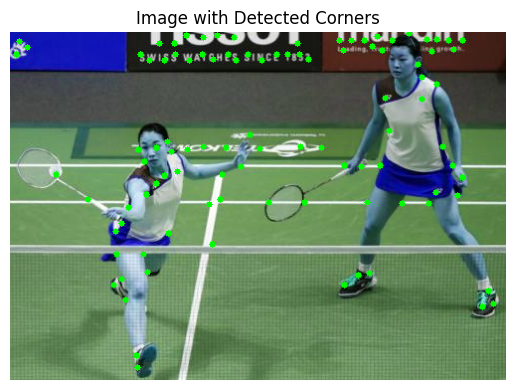

In [8]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define parameters for corner detection
max_corners = 100  # Maximum number of corners to return
quality_level = 0.01  # Minimum accepted quality of corners
min_distance = 10  # Minimum possible Euclidean distance between the returned corners

# Detect corners using the Shi-Tomasi method
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)

# Convert corners to integers
corners = np.int0(corners)

# Draw circles around detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

# Display the image with detected corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Corners')
plt.axis('off')
plt.show()